# Kaggle Titanic Dataset Challenge – EDA

_created by Austin Poor_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from pathlib import Path
DATA_DIR = Path("../data")
list(DATA_DIR.glob("*"))

[PosixPath('../data/test.csv'),
 PosixPath('../data/train.csv'),
 PosixPath('../data/gender_submission.csv')]

In [3]:
df_train = pd.read_csv(DATA_DIR / "train.csv")
df_train = pd.get_dummies(
    df_train,
    columns=["Sex","Embarked"],
    drop_first=True
)
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [5]:
# Compare columns by the absolute value of their 
# correlation with the target (Survived)

df_train.corr()["Survived"]\
    .apply(lambda c: (abs(c), c))\
    .sort_values(ascending=False)\
    .apply(lambda c: c[1])

Survived       1.000000
Sex_male      -0.543351
Pclass        -0.338481
Fare           0.257307
Embarked_S    -0.155660
Parch          0.081629
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Embarked_Q     0.003650
Name: Survived, dtype: float64

In [17]:
plot_cols = np.array([
    "Survived",
    "Sex_male",
    "Pclass",
    "Fare",
    "Embarked_S",
    "Parch",
    "Age",
    "SibSp",
    "Embarked_Q"
]).reshape((3,3))

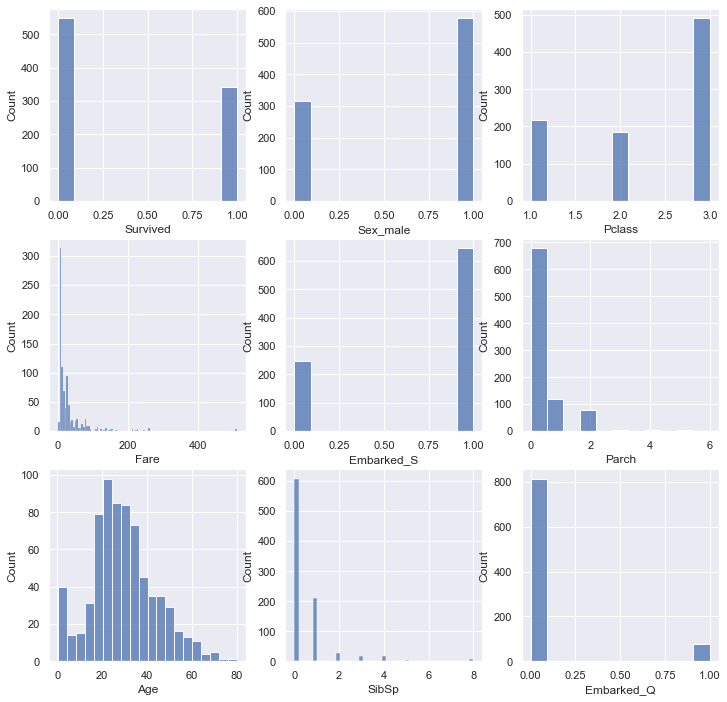

In [18]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
for i, r in enumerate(plot_cols):
    for j, c in enumerate(r):
        sns.histplot(df_train[c],ax=ax[i,j])